In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [7]:
df = pd.read_csv('./data/clean.csv')

In [8]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
x = df.drop('Discount Price', axis = 1)
y = df['Discount Price']

In [11]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test,y_pred)
print(res)

-36.37579905364166


By decision tree regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

0.8379313570773788


RandomForest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

0.5561804486618063


XGBoost Algorithm

In [18]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

0.6958960389142593


overfitting finding

In [19]:
from sklearn.model_selection import cross_val_score

cheking for dt

In [20]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

score = cross_val_score(dt_model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.735002325081987
cross_val_score:  [ 0.3831523   0.50520506  0.0416094   0.15156517 -0.25108752] 0.1660888836468286 0.26527666147579737


cheking for rf

In [22]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

score = cross_val_score(rf_model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.5887663703320687
cross_val_score:  [0.4804654  0.74941687 0.47073827 0.59935046 0.80093569] 0.6201813372628958 0.13539694077920822


cheking for xgboost

In [23]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test,y_pred)
print(res)

score = cross_val_score(model,x,y,cv=5,scoring='r2')

print('cross_val_score: ',score,score.mean(),score.std())

0.6958960389142593
cross_val_score:  [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745987 0.11047932405115406


Now we will go with xgboost only because it gives good result so we will apply hyperparameter tuning on this model

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
    'learning_rate':[0.01,0.1,0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.7460260949741992


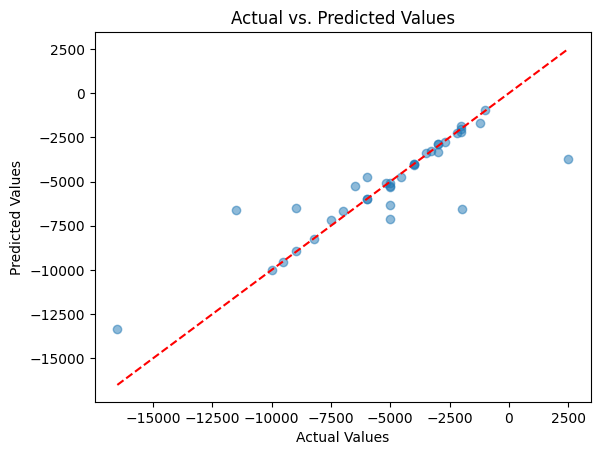

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test,y_pred,alpha=0.5)

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], 'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [29]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(best_model, f)

In [30]:
with open('model.pkl','rb') as f:
    xgb_model = pickle.load(f)

In [32]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_pred))

0.7460260949741992
